# **2021ML FALL HW1: PM2.5 Prediction (Regression)**

Author: MLTAs

Methods:
* Training with all data
* Training (mini-batch=64, optimizer=Adam, learning rate=0.001)

Running this code on Google Colab probably passes simple baselines on Kaggle.

Tovpass


## **Download Data**


If the Google drive links are dead, you can download data from [kaggle](https://www.kaggle.com/c/ml2021spring-hw1/data), and upload data manually to the workspace.

In [2]:
tr_path = 'train.csv'  # path to training data
tt_path = 'test.csv'   # path to testing data

# !gdown --id '1AtgWdt7mXNBrai0ktxeGx3ZFMPu1B1KM' --output train.csv
# !gdown --id '15MCDFuAW5Z4n2yXJg3VbyIAnP4Dz-Tn_' --output test.csv

#如果連結壞掉可以改用下面這組或把資料直接載到自己的電腦裡電腦裡
!gdown --id '1p6NE6zTGo8sQyLegdr2NzPTNp4xMFwmt' --output train.csv
!gdown --id '1fFpPPXp54K9c7_93OE4Tdxm4A9pp8bf8' --output test.csv

Permission denied: https://drive.google.com/uc?id='1p6NE6zTGo8sQyLegdr2NzPTNp4xMFwmt'
Maybe you need to change permission over 'Anyone with the link'?
Permission denied: https://drive.google.com/uc?id='1fFpPPXp54K9c7_93OE4Tdxm4A9pp8bf8'
Maybe you need to change permission over 'Anyone with the link'?


# **Import Some Packages**

In [7]:
# For data preprocess
import numpy as np
import csv
import math
import pandas as pd
import math

In [8]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [9]:
print(data_train.shape)
print(data_test.shape)

(17520, 18)
(7713, 18)


In [10]:
print(data_train.columns)
print(data_test.columns)

Index(['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
       'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED',
       'WS_HR', 'PM2.5'],
      dtype='object')
Index(['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
       'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED',
       'WS_HR', 'PM2.5'],
      dtype='object')


In [11]:
data_train.describe()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,PM2.5
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,25.161650,1.892513,0.389568,0.141671,2.407900,12.858624,15.151341,32.567289,55.438813,0.289018,76.992979,2.753242,2.032127,144.844406,147.080137,2.153225,1.917494,28.028653
std,4.696892,0.190634,0.196624,0.519947,6.987633,10.903329,12.179576,21.156994,109.271034,2.236446,11.465273,5.353715,0.532424,122.507042,122.215499,0.957886,1.987403,120.886041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.800000,0.260000,0.070000,1.000000,7.500000,9.000000,17.500000,27.000000,0.000000,69.000000,1.900000,1.900000,21.000000,23.000000,1.400000,1.200000,11.000000
50%,26.000000,1.900000,0.370000,0.110000,1.500000,11.600000,13.400000,28.000000,44.000000,0.000000,79.000000,2.500000,2.000000,136.000000,138.000000,2.100000,1.800000,20.000000
75%,28.700000,1.970000,0.480000,0.170000,2.400000,16.500000,18.700000,44.500000,65.000000,0.000000,85.000000,3.200000,2.110000,257.000000,259.000000,2.800000,2.400000,31.000000
max,34.300000,16.660000,9.690000,40.450000,421.400000,463.500000,465.800000,415.200000,6666.000000,63.800000,100.000000,403.700000,40.500000,360.000000,360.000000,8.000000,50.500000,10391.000000


In [12]:
print(data_train[data_train['PM2.5'] > 5000].shape)
print(data_train[data_train['PM2.5'] > 4000].shape)
print(data_train[data_train['PM2.5'] > 3000].shape)
print(data_train[data_train['PM2.5'] > 2000].shape)
print(data_train[data_train['PM2.5'] > 1000].shape)
#斷層出現在這裡
print(data_train[data_train['PM2.5'] > 800].shape)
print(data_train[data_train['PM2.5'] > 600].shape)
print(data_train[data_train['PM2.5'] > 400].shape)
print(data_train[data_train['PM2.5'] > 200].shape)
print(data_train[data_train['PM2.5'] > 100].shape)
#第二個斷層
print(data_train[data_train['PM2.5'] > 50].shape)

(3, 18)
(3, 18)
(3, 18)
(5, 18)
(5, 18)
(32, 18)
(86, 18)
(86, 18)
(87, 18)
(98, 18)
(967, 18)


# 大於1000的資料只有五筆

In [13]:
data_train[data_train['PM2.5'] > 1000]

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,PM2.5
14141,25.4,1.81,0.15,0.04,0.6,3.5,4.1,30.3,5,26.2,98,0.5,1.85,132,146,2.3,1.9,2246
14142,25.1,1.82,0.19,0.05,0.6,4.7,5.4,35.1,5,9.6,98,1.0,1.86,139,110,1.9,2.1,2242
14143,25.2,1.86,0.31,0.12,0.7,12.6,13.3,28.1,5,4.2,98,1.2,1.98,119,123,2.4,2.0,5703
14144,25.6,1.86,0.32,0.10,1.1,10.2,11.2,21.8,5,6.0,98,1.1,1.96,108,106,2.3,2.0,6925
14145,25.8,1.85,0.35,0.15,1.9,13.4,15.3,18.9,10,3.0,97,1.2,2.00,77,74,2.3,1.8,10391


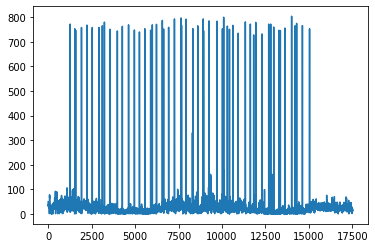

In [14]:
a = data_train[data_train['PM2.5'] < 1000]
plt.plot(a['PM2.5'])
plt.show()

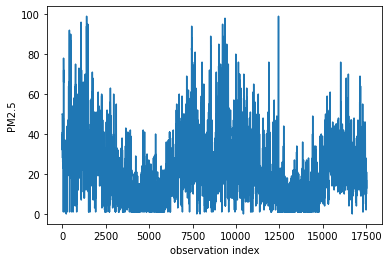

In [16]:
a = data_train[data_train['PM2.5'] < 100]
plt.plot(a['PM2.5'])
plt.xlabel("observation index")
plt.ylabel("PM2.5")
plt.show()

# EDA

In [5]:
import matplotlib.pyplot as plt

In [6]:
data_train.head(15)

NameError: name 'data_train' is not defined

In [3]:
plt.plot(data_train['PM2.5'])
plt.show()

NameError: name 'plt' is not defined

In [8]:
data_train[data_train['PM2.5'] > 58]

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,PM2.5
72,18.6,2.00,0.53,0.20,1.3,16.2,17.5,36.5,120,0.0,92,3.0,2.20,39,57,0.9,0.6,71
73,18.5,2.04,0.54,0.26,1.5,17.0,18.5,30.0,123,0.0,92,3.7,2.30,42,19,1.7,0.8,78
74,18.4,2.03,0.46,0.30,1.6,24.8,26.4,19.0,116,0.0,93,4.1,2.32,51,74,1.3,1.3,66
75,18.1,2.10,0.43,0.24,0.7,17.1,17.8,23.1,112,0.0,93,3.8,2.30,70,71,1.0,1.1,63
76,18.2,2.01,0.42,0.17,0.3,13.3,13.7,28.0,107,0.0,91,3.4,2.18,45,35,1.3,0.8,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17316,24.9,1.97,0.40,0.15,1.6,14.1,15.7,43.6,50,0.4,70,2.0,2.11,3,357,2.2,1.3,1000
17317,25.4,1.90,0.36,0.08,1.4,10.8,12.3,48.9,1000,0.0,68,2.2,1.99,330,327,2.0,1.8,1000
17318,25.3,1.89,0.36,0.09,1.6,10.4,12.0,51.5,67,0.0,70,2.1,1.98,338,342,1.4,2.0,1000
17483,22.5,1.78,0.26,0.10,4.0,15.2,19.2,34.5,5,0.2,79,1.3,1.88,8,24,3.1,2.9,1000


In [9]:
data_train.isna().sum()

AMB_TEMP      0
CH4           0
CO            0
NMHC          0
NO            0
NO2           0
NOx           0
O3            0
PM10          0
RAINFALL      0
RH            0
SO2           0
THC           0
WD_HR         0
WIND_DIREC    0
WIND_SPEED    0
WS_HR         0
PM2.5         0
dtype: int64

# Data preprocessing

In [56]:
data_train.max(axis = 0)

AMB_TEMP         34.30
CH4              16.66
CO                9.69
NMHC             40.45
NO              421.40
NO2             463.50
NOx             465.80
O3              415.20
PM10           6666.00
RAINFALL         63.80
RH              100.00
SO2             403.70
THC              40.50
WD_HR           360.00
WIND_DIREC      360.00
WIND_SPEED        8.00
WS_HR            50.50
PM2.5         10391.00
dtype: float64

In [4]:
class DataPreprocessor():
    def __init__(self):
        self.keep_col = None
        self.top_corr_number = 15
        self.train_mean = None
        self.train_std = None
    
    def remove_outlier_y_with_IQR(self, data_train: pd.DataFrame):
        mean_y = data_train['PM2.5'].mean()
        q75, q25 = np.percentile(data_train['PM2.5'], [75 ,25])
        IQR = q75 - q25
        upper_bound = mean_y + 1.5 * IQR
        lower_bound = mean_y - 1.5 * IQR
        # print(IQR)
        # print(upper_bound)
        # print(lower_bound)
        keep_cond = (data_train['PM2.5'] < upper_bound) & (data_train['PM2.5'] > lower_bound)
        data_train = data_train[keep_cond]
        return data_train

    def remove_larger_than_1000(self, data_train: pd.DataFrame):
        data_train = data_train[data_train['PM2.5'] < 1000]
        return data_train

    def slice_top_n_correlation_with_y(self, data: pd.DataFrame, isTraining = False):
        if isTraining:
            index_corr_descending = abs(data.corrwith(data['PM2.5'])).sort_values(ascending=False).index
            #first column will always be `PM2.5`
            self.keep_col = index_corr_descending[:self.top_corr_number]
        data = data[self.keep_col]
        #print(data)
        return data

    def normalize_data(self, X_data: np.array, isTraining = False):
        if isTraining:
            self.train_mean = X_data.mean(axis = 0)
            self.train_std = X_data.std(axis = 0)
        normalized_data = (X_data - self.train_mean) / self.train_std
        return normalized_data

    def min_max_scaling(self, X_data: np.array, isTraining = False):
        if isTraining:
            self.train_max = X_data.max(axis = 0)
            self.train_min = X_data.min(axis = 0)
        normalized_data = (X_data - self.train_min) / (self.train_max - self.train_min)
        return normalized_data


    def parse2train(self, data):
        data = data.values
        x = []
        y = []
        # 用前面9筆資料預測下一筆PM2.5 所以需要-9
        total_length = data.shape[0] - 9
        for i in range(total_length):
            x_tmp = data[i:i+9, :]
            y_tmp = data[i+9, 0] #PM2.5 is the first column
            x.append(x_tmp.reshape(-1,))
            y.append(y_tmp)
        x = np.array(x) #shape = (# of observations, # of features * # of time lag)
        y = np.array(y)
        return x, y


    def parse2test(self, data):
        x = []
        y = []
        data = data.values
        # 用前面9筆資料預測下一筆PM2.5 所以需要-9
        total_length = data.shape[0] - 9
        for i in range(857):
            x_tmp = data[9 * i: 9 * i + 9, :]
            x.append(x_tmp.reshape(-1,))
        # x 會是一個(n, 18, 9)的陣列， y 則是(n, 1) 
        x = np.array(x)
        return x

    def preprocess_train_data(self, data_train: pd.DataFrame):
        data_train = self.remove_outlier_y_with_IQR(data_train)
        #data_train = self.remove_larger_than_1000(data_train)
        data_train = self.slice_top_n_correlation_with_y(data_train, isTraining=True)
        X_train, y_train = self.parse2train(data_train)
        #X_train = self.normalize_data(X_train, isTraining = True)
        X_train = self.min_max_scaling(X_train, isTraining = True)
        return X_train, y_train

    def preprocess_test_data(self, data_test: pd.DataFrame):
        data_test = self.slice_top_n_correlation_with_y(data_test, isTraining=False)
        X_test = self.parse2test(data_test)
        #X_test = self.normalize_data(X_test, isTraining = False)
        X_test = self.min_max_scaling(X_test, isTraining = False)
        return X_test

In [5]:
DP = DataPreprocessor()
X_train, y_train = DP.preprocess_train_data(data_train)
X_test = DP.preprocess_test_data(data_test)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train)

(16944, 135)
(857, 135)
[33. 41. 38. ... 14. 15. 13.]


In [7]:
X_train

array([[0.86206897, 0.06707946, 0.12004802, ..., 0.075     , 0.06944444,
        0.25      ],
       [0.86206897, 0.0619195 , 0.12004802, ..., 0.06944444, 0.02222222,
        0.3125    ],
       [0.74137931, 0.05675955, 0.12004802, ..., 0.05833333, 0.99722222,
        0.275     ],
       ...,
       [0.20689655, 0.05366357, 0.11584634, ..., 0.02777778, 0.01111111,
        0.2       ],
       [0.27586207, 0.05263158, 0.11584634, ..., 0.        , 0.99722222,
        0.2125    ],
       [0.24137931, 0.05263158, 0.11644658, ..., 0.03888889, 0.05555556,
        0.2       ]])

In [12]:
class LinearRegression():
    def __init__(self):
        self.train_valid_ratio = 0.70
        self.train_loss = list()
        self.valid_loss = list()
        #record best information
        self.best_w = None
        self.best_bias = None
        self.best_valid_RMSE = None
        self.best_epoch = None
        self.stop_epoch = None

    def initialize_params(self, x):
        w = np.full(x[1].shape, 0.1).reshape(-1, 1)
        bias = 0.1
        return w, bias

    def train(self, x, y,batch_size, epoch_size, learning_rate, verbose = True):
        #Initialize parameter
        batch_size = batch_size 
        epoch_size = epoch_size 
        lr = learning_rate
        w, bias = self.initialize_params(x)
        best_valid_RMSE = 99999
        best_epoch = 0
        patience = 10 #for early stopping

        #Adam optimizer
        lam = 0.001 #L2 regularization
        beta_1 = np.full(x[0].shape, 0.9).reshape(-1, 1) #exponential decay rates for the moment estimates
        beta_2 = np.full(x[0].shape, 0.999).reshape(-1,1) #exponential decay rates for the moment estimates
        #m_t: first momentum vector, for momentum
        m_t = np.full(x[0].shape, 0).reshape(-1, 1)
        #v_t: second momemtum vector, for RMSprop
        v_t = np.full(x[0].shape, 0).reshape(-1, 1)
        m_t_b = 0.0
        v_t_b = 0.0
        t = 0
        epsilon = 1e-8

        for num_epoch in range(1, epoch_size + 1):
            #Shuffle when each epoch begin
            index = np.arange(x.shape[0])
            np.random.shuffle(index)
            x = x[index]
            y = y[index]
            split_point_x = math.floor(x.shape[0] * self.train_valid_ratio)
            split_point_y = math.floor(y.shape[0] * self.train_valid_ratio)
            X_train = x[:split_point_x, :]
            y_train = y[:split_point_y] 
            X_valid = x[split_point_x:, :] 
            y_valid = y[split_point_y:]
            SSE = 0
            for num_batch in range(int(X_train.shape[0]/batch_size)):
                t+=1
                x_batch = X_train[num_batch * batch_size:(num_batch + 1) * batch_size]
                y_batch = y_train[num_batch * batch_size:(num_batch + 1) * batch_size].reshape(-1,1)
                
                y_hat = np.dot(x_batch, w) + bias
                train_loss = y_batch - y_hat
                # 計算gradient
                g_t = np.dot(x_batch.transpose(), train_loss) * (-2) +  2 * lam * np.sum(w)
                #助教原本寫的是*2
                g_t_b = train_loss.sum(axis=0) * (-2)
                m_t = beta_1*m_t + (1-beta_1)*g_t 
                v_t = beta_2*v_t + (1-beta_2)*np.multiply(g_t, g_t)
                m_cap = m_t/(1-(beta_1**t))
                v_cap = v_t/(1-(beta_2**t))
                m_t_b = 0.9*m_t_b + (1-0.9)*g_t_b
                v_t_b = 0.999*v_t_b + (1-0.999) * (g_t_b*g_t_b) 
                m_cap_b = m_t_b/(1-(0.9**t))
                v_cap_b = v_t_b/(1-(0.999**t))

                # 更新weight, bias
                w -= ((lr*m_cap)/(np.sqrt(v_cap)+epsilon)).reshape(-1, 1)
                bias -= (lr*m_cap_b)/(math.sqrt(v_cap_b)+epsilon)
                SSE += np.sum(np.square(train_loss))

            # print(SSE)
            train_RMSE = np.sqrt(SSE / X_train.shape[0])
            valid_RMSE = self.compute_valid_RMSE(X_valid, y_valid, w, bias)
            self.train_loss.append(train_RMSE)
            self.valid_loss.append(valid_RMSE)
            if verbose:
                print(f"Epoch {num_epoch}, training RMSE = {round(train_RMSE, 5)}, validation RMSE = {round(valid_RMSE, 5)}")
            
            #save best result
            if valid_RMSE < best_valid_RMSE:
                self.best_w = w
                self.best_bias = bias
                self.best_epoch = num_epoch
                best_valid_RMSE = valid_RMSE
                self.best_valid_RMSE = best_valid_RMSE

            #early stopping
            if valid_RMSE > best_valid_RMSE and num_epoch >= self.best_epoch + patience:
                self.stop_epoch = self.best_epoch + patience
                if verbose:
                    print("Early Stopping!")
                    print("="*10 + "validation result" + "="*10)
                    print(f"Best epoch is {self.best_epoch} with minimum validation error = {round(best_valid_RMSE, 5)}")
                return

        self.stop_epoch = num_epoch
        if verbose:
            print("="*10 + "Model result" + "="*10)
            print(f"Best epoch is {self.best_epoch} with minimum validation error = {round(best_valid_RMSE, 5)}")
                      
    def compute_valid_RMSE(self, X_valid, y_valid, w, bias):
        valid_loss = 0
        y_hat = np.dot(X_valid, w) + bias
        valid_loss = y_valid.reshape(-1, 1) - y_hat.reshape(-1, 1)
        valid_SSE = np.sum(np.square(valid_loss))
        valid_RMSE = np.sqrt(valid_SSE / X_valid.shape[0])
        return valid_RMSE

    def train_with_full_data(self, x, y, batch_size, epoch_size, learning_rate, verbose = True):
        #Initialize parameter
        batch_size = batch_size 
        epoch_size = epoch_size 
        lr = learning_rate
        w, bias = self.initialize_params(x)

        #Adam optimizer
        lam = 0.001 #L2 regularization
        beta_1 = np.full(x[0].shape, 0.9).reshape(-1, 1) #exponential decay rates for the moment estimates
        beta_2 = np.full(x[0].shape, 0.999).reshape(-1,1) #exponential decay rates for the moment estimates
        #m_t: first momentum vector, for momentum
        m_t = np.full(x[0].shape, 0).reshape(-1, 1)
        #v_t: second momemtum vector, for RMSprop
        v_t = np.full(x[0].shape, 0).reshape(-1, 1)
        m_t_b = 0.0
        v_t_b = 0.0
        t = 0
        epsilon = 1e-8

        for num_epoch in range(1, epoch_size + 1):
            #Shuffle when each epoch begin
            index = np.arange(x.shape[0])
            np.random.shuffle(index)
            x = x[index]
            y = y[index]

            SSE = 0
            for num_batch in range(int(x.shape[0]/batch_size)):
                t+=1
                x_batch = x[num_batch * batch_size:(num_batch + 1) * batch_size]
                y_batch = y[num_batch * batch_size:(num_batch + 1) * batch_size].reshape(-1,1)
                
                y_hat = np.dot(x_batch, w) + bias
                train_loss = y_batch - y_hat
                # 計算gradient
                g_t = np.dot(x_batch.transpose(), train_loss) * (-2) +  2 * lam * np.sum(w)
                #助教原本寫的是*2
                g_t_b = train_loss.sum(axis=0) * (-2)
                m_t = beta_1*m_t + (1-beta_1)*g_t 
                v_t = beta_2*v_t + (1-beta_2)*np.multiply(g_t, g_t)
                m_cap = m_t/(1-(beta_1**t))
                v_cap = v_t/(1-(beta_2**t))
                m_t_b = 0.9*m_t_b + (1-0.9)*g_t_b
                v_t_b = 0.999*v_t_b + (1-0.999) * (g_t_b*g_t_b) 
                m_cap_b = m_t_b/(1-(0.9**t))
                v_cap_b = v_t_b/(1-(0.999**t))

                # 更新weight, bias
                w -= ((lr*m_cap)/(np.sqrt(v_cap)+epsilon)).reshape(-1, 1)
                bias -= (lr*m_cap_b)/(math.sqrt(v_cap_b)+epsilon)
                SSE += np.sum(np.square(train_loss))

            # print(SSE)
            train_RMSE = np.sqrt(SSE / x.shape[0])
            self.train_loss.append(train_RMSE)
            if verbose:
                print(f"Epoch {num_epoch}, training RMSE = {round(train_RMSE, 5)}")

        self.best_w = w
        self.best_bias = bias

    def predict(self, X_test, w, bias):
        predict_value = np.dot(X_test, w) + bias
        return predict_value

In [5]:
#train_valid_ratio_list = [0.6, 0.7, 0.8, 0.9]
batch_size_list = [64, 128, 256, 512, 1024]
epoch_size_list = [20, 30, 50, 100]
learning_rate_list = [0.002, 0.005, 0.01, 0.025, 0.05]

#Model saving
global_best_w = 0
global_best_bias = 0
global_best_RMSE = 1000000

#Hyperparameter saving
best_train_valid_ratio = 0
best_batch_size = 0
best_epoch_size = 0
best_learning_rate = 0
# for train_valid_ratio in train_valid_ratio_list:
for batch_size in batch_size_list:
    for epoch_size in epoch_size_list:
        for learning_rate in learning_rate_list:
            print("=" * 10,"Start training model", "="*10)
            print(f"batch size = {batch_size}, epoch_size = {epoch_size}, learning rate = {learning_rate}")
            model = LinearRegression()
            model.train(X_train, y_train, batch_size, epoch_size, learning_rate, verbose = True)
            if model.best_valid_RMSE < global_best_RMSE:
                global_best_RMSE = model.best_valid_RMSE
                global_best_w = model.best_w
                global_best_bias = model.best_bias
                best_batch_size = batch_size
                best_epoch_size = epoch_size
                best_stop_epoch_size = model.best_epoch
                best_learning_rate = learning_rate

========== Start training model ==========
batch size = 64, epoch_size = 20, learningrate = 0.002


NameError: name 'LinearRegression' is not defined

In [15]:
print("=" * 10, " Best Model result ", "=" * 10)
print(f"Batch Size = {best_batch_size}, Epoch Size = {best_epoch_size} (Actually running {best_stop_epoch_size} epoch),Learning rate = {best_learning_rate}")
print(f"Validation RMSE = {global_best_RMSE}")

==========  Best Model result  ==========
Batch Size = 64, Epoch Size = 100 (Actually running 50 epoch),Learning rate = 0.025
Validation RMSE = 4.641109180217822


In [25]:
train_all_model = LinearRegression()
train_all_model.train_with_full_data(X_train, y_train, best_batch_size, best_stop_epoch_size, best_learning_rate, verbose = True)

Epoch 1, training RMSE = 11.03515
Epoch 2, training RMSE = 7.68767
Epoch 3, training RMSE = 7.05178
Epoch 4, training RMSE = 6.66769
Epoch 5, training RMSE = 6.37108
Epoch 6, training RMSE = 6.11804
Epoch 7, training RMSE = 5.91176
Epoch 8, training RMSE = 5.75522
Epoch 9, training RMSE = 5.61507
Epoch 10, training RMSE = 5.50542
Epoch 11, training RMSE = 5.41061
Epoch 12, training RMSE = 5.33781
Epoch 13, training RMSE = 5.26259
Epoch 14, training RMSE = 5.20534
Epoch 15, training RMSE = 5.15186
Epoch 16, training RMSE = 5.11075
Epoch 17, training RMSE = 5.07185
Epoch 18, training RMSE = 5.03116
Epoch 19, training RMSE = 5.01052
Epoch 20, training RMSE = 4.99216
Epoch 21, training RMSE = 4.96496
Epoch 22, training RMSE = 4.94611
Epoch 23, training RMSE = 4.92568
Epoch 24, training RMSE = 4.90611
Epoch 25, training RMSE = 4.89538
Epoch 26, training RMSE = 4.87842
Epoch 27, training RMSE = 4.87186
Epoch 28, training RMSE = 4.86729
Epoch 29, training RMSE = 4.85851
Epoch 30, training RMS

In [1]:
final_w = train_all_model.best_w
final_bias = train_all_model.best_bias

NameError: name 'train_all_model' is not defined

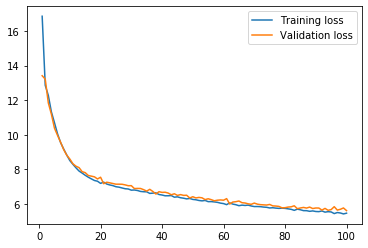

In [20]:
train_loss = model.train_loss
valid_loss = model.valid_loss
x = [i+1 for i in range(model.stop_epoch)]
plt.plot(x, train_loss, label = "Training loss")
plt.plot(x, valid_loss, label = "Validation loss")
plt.legend()
plt.show()

In [29]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a.sum(axis = 0)) #axis = 0: 橫向相加
print(a.sum(axis = 1)) #axis = 1: 直向相加

[5 7 9]
[ 6 15]


# **預測testing set並寫成並寫成csv檔**

In [21]:
#Training with all data
predict_model = LinearRegression()
y_pred = predict_model.predict(X_test, final_w, final_bias)

In [64]:
#Training with training data
predict_model = LinearRegression()
y_pred = predict_model.predict(X_test, global_best_w, global_best_bias)

In [22]:
def write_to_csv(y_pred, file_name):
    with open(file_name, 'w', newline='') as csvf:
        # 建立 CSV 檔寫入器
        writer = csv.writer(csvf)
        writer.writerow(['Id','Predicted'])
        for i in range(int(y_pred.shape[0])):
            writer.writerow([i + 1, y_pred[i][0]])

In [23]:
#記得改名字
file_name = 'submission_1017_1.csv'
write_to_csv(y_pred, file_name)